<a href="https://colab.research.google.com/github/manishkhanal1989/Project/blob/main/Predictive_Analysis_of_Employee_Salary_Based_on_Work_Related_Attributes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='PURPLE'>**Predictive Analysis of Employee Salary Based on Work-Related Attributes**</font>

**By: Manish Khanal**

## Data Information:

**Sources:**

The dataset is obtained from Kaggle, sourced from IBM HR Analytics:

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

**Description:**

Originating from IBM HR Analytics, this dataset is tailored for predicting employee salaries within a corporate environment. Curated by IBM data scientists, it encompasses a variety of attributes providing insights into employees' backgrounds, job roles, satisfaction levels, and work-life balance. Crucial variables for the salary prediction model include education levels, environment satisfaction, job involvement, job satisfaction, performance ratings, relationship satisfaction, and work-life balance. Categorical attributes such as education and satisfaction levels are quantified, offering a diverse set of features for the analysis.


**Size:**

1470 rows and 35 columns

**Target**

MonthlyIncome

The goal is to predict MonthlyIncome based on other different variables.

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [3]:
#Load IBM Attrition dataset using pandas
from google.colab import files

uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [5]:
df = pd.read_csv(next(iter(uploaded)))

# <font color='red'>**EXPLORATORY DATA ANALYSIS**</font>

In [6]:
#Checking the first five rows of the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
# Checking Data types
data_types = df.dtypes
print(data_types)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# <font color='red'>**Missing Values**</font>

In [8]:
# Checking missing values
missing_values = df.isnull().sum()
print(missing_values)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**Since none of the columns have missing values, no further action is required.**

# <font color='red'>**Outliers**</font>

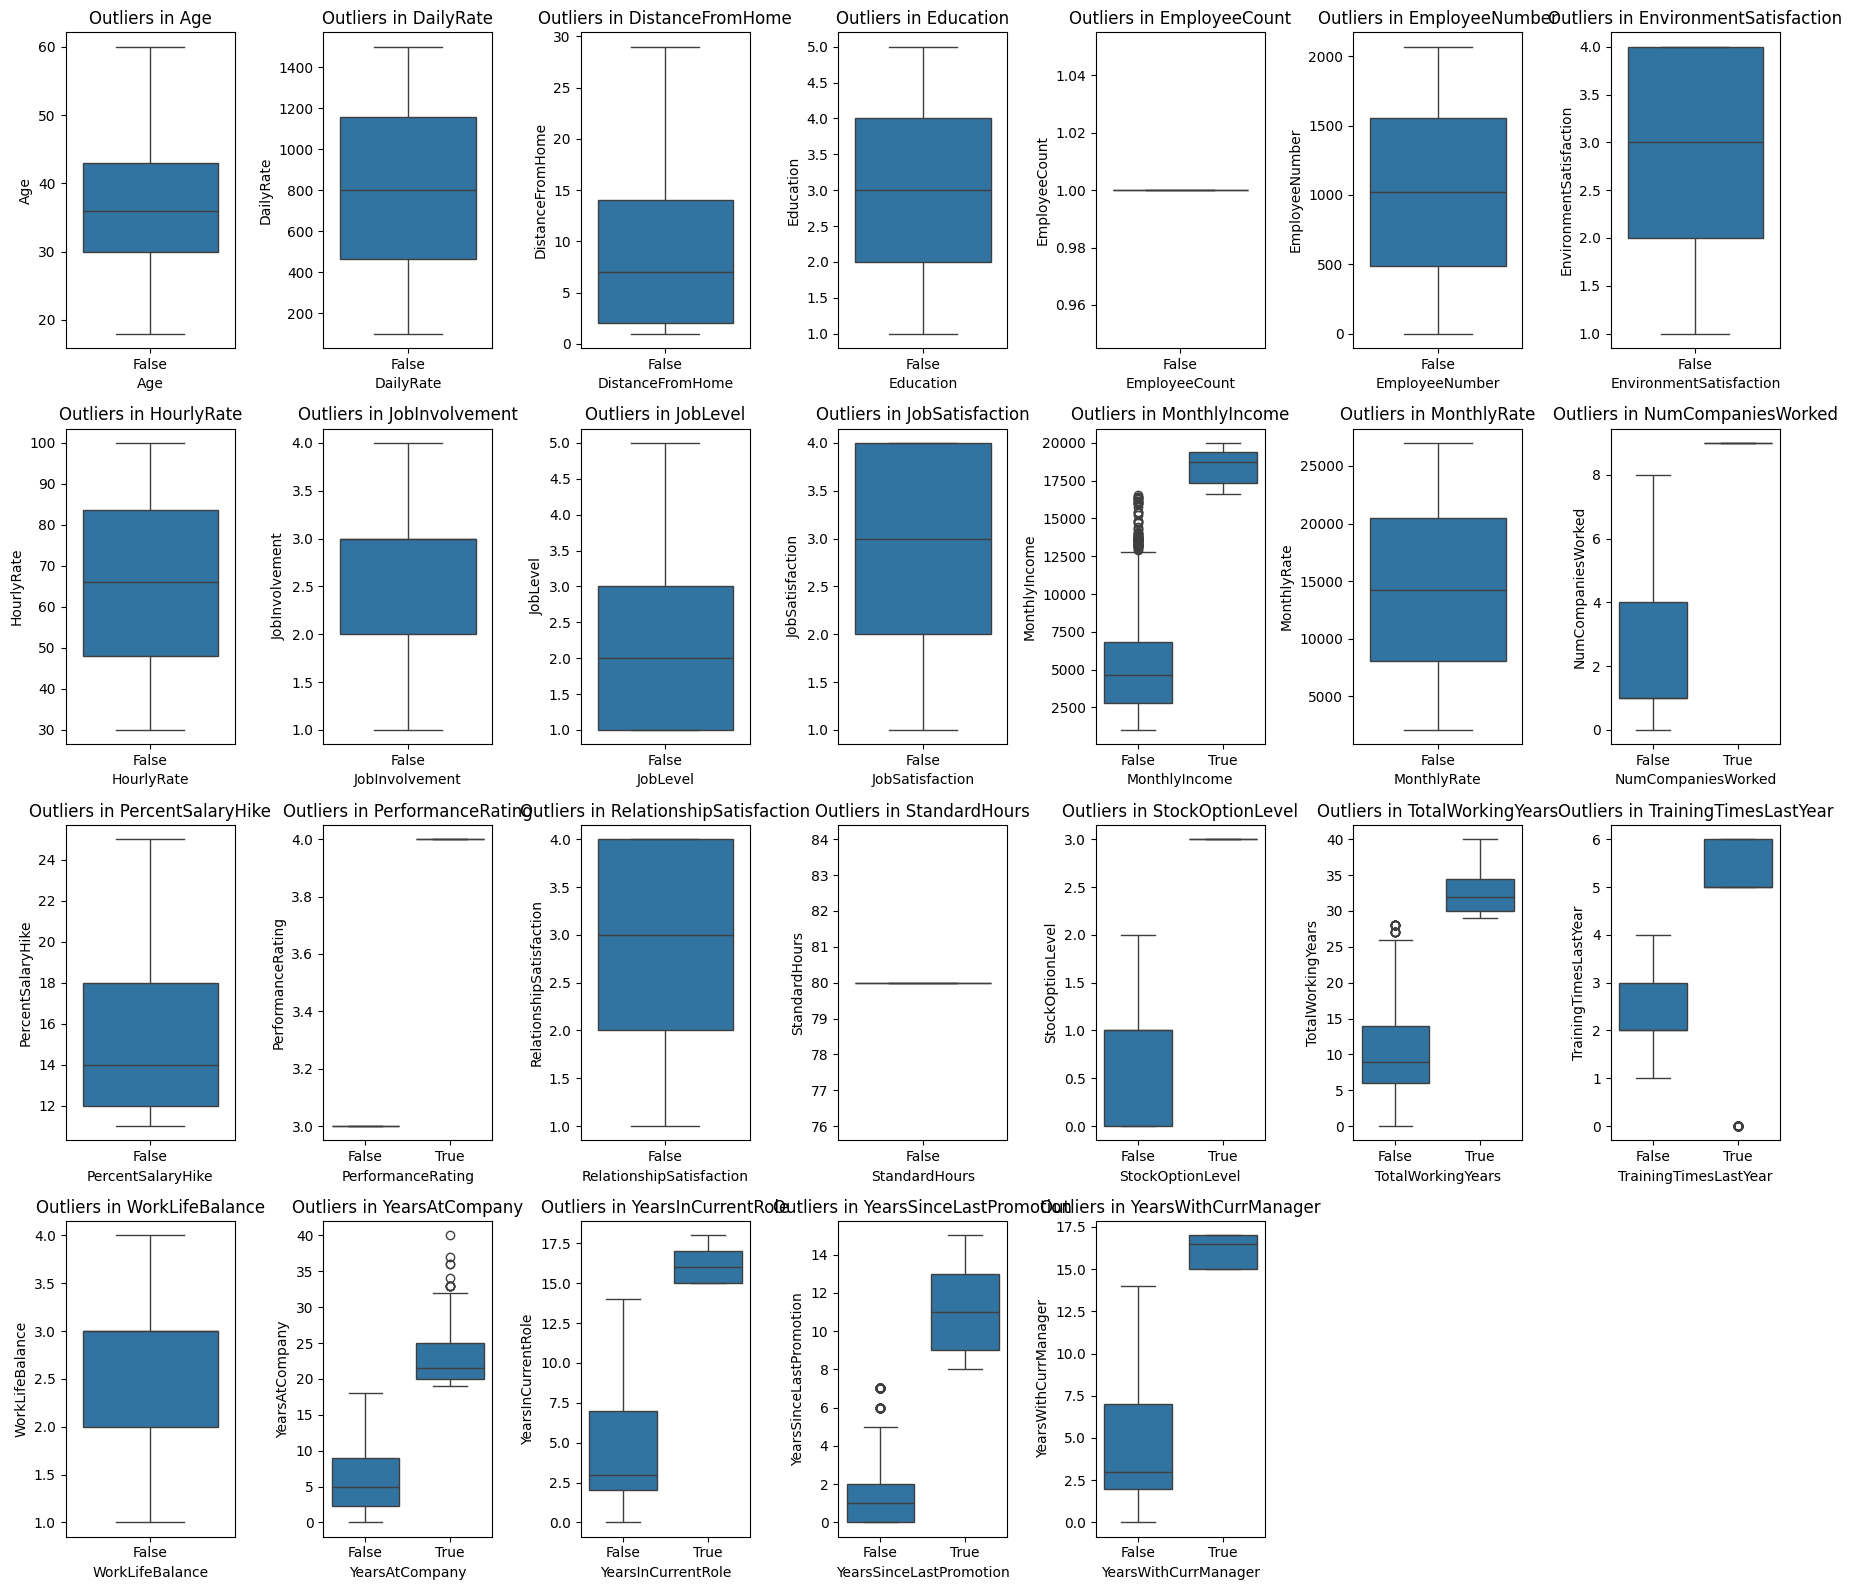

In [9]:
# Handling Outliers
numerical_features = df.select_dtypes(include=['int64'])
Q1 = numerical_features.quantile(0.25)
Q3 = numerical_features.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (numerical_features < lower_bound) | (numerical_features > upper_bound)

# Visualizing outliers for each numerical feature
num_cols = min(len(numerical_features.columns), 7)
num_rows = -(-len(numerical_features.columns) // num_cols) if num_cols != 0 else 0

plt.figure(figsize=(18, 4 * num_rows))
for i, column in enumerate(numerical_features.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=outliers[column], y=numerical_features[column])
    plt.title(f'Outliers in {column}')

plt.tight_layout()
plt.show()

In a meticulous examination of the dataset, numerical outliers were discerned through robust statistical methods, employing measures such as the Interquartile Range (IQR). Instead of hastily eliminating these outliers, a deliberate choice was made to retain them within the dataset. This decision was guided by the recognition that outliers might encapsulate invaluable insights, offering unique perspectives on genuine variations within the realm of employee salaries. Far from being erroneous, these data points were deemed as potential contributors to the overall analysis, representing distinctive scenarios or exceptional cases. By opting to preserve outliers, the analysis aims to fully explore their potential influence on the predictive model, acknowledging the nuanced information they bring to the understanding of employee salary dynamics.

# <font color='red'>**Checking Distributions**</font>

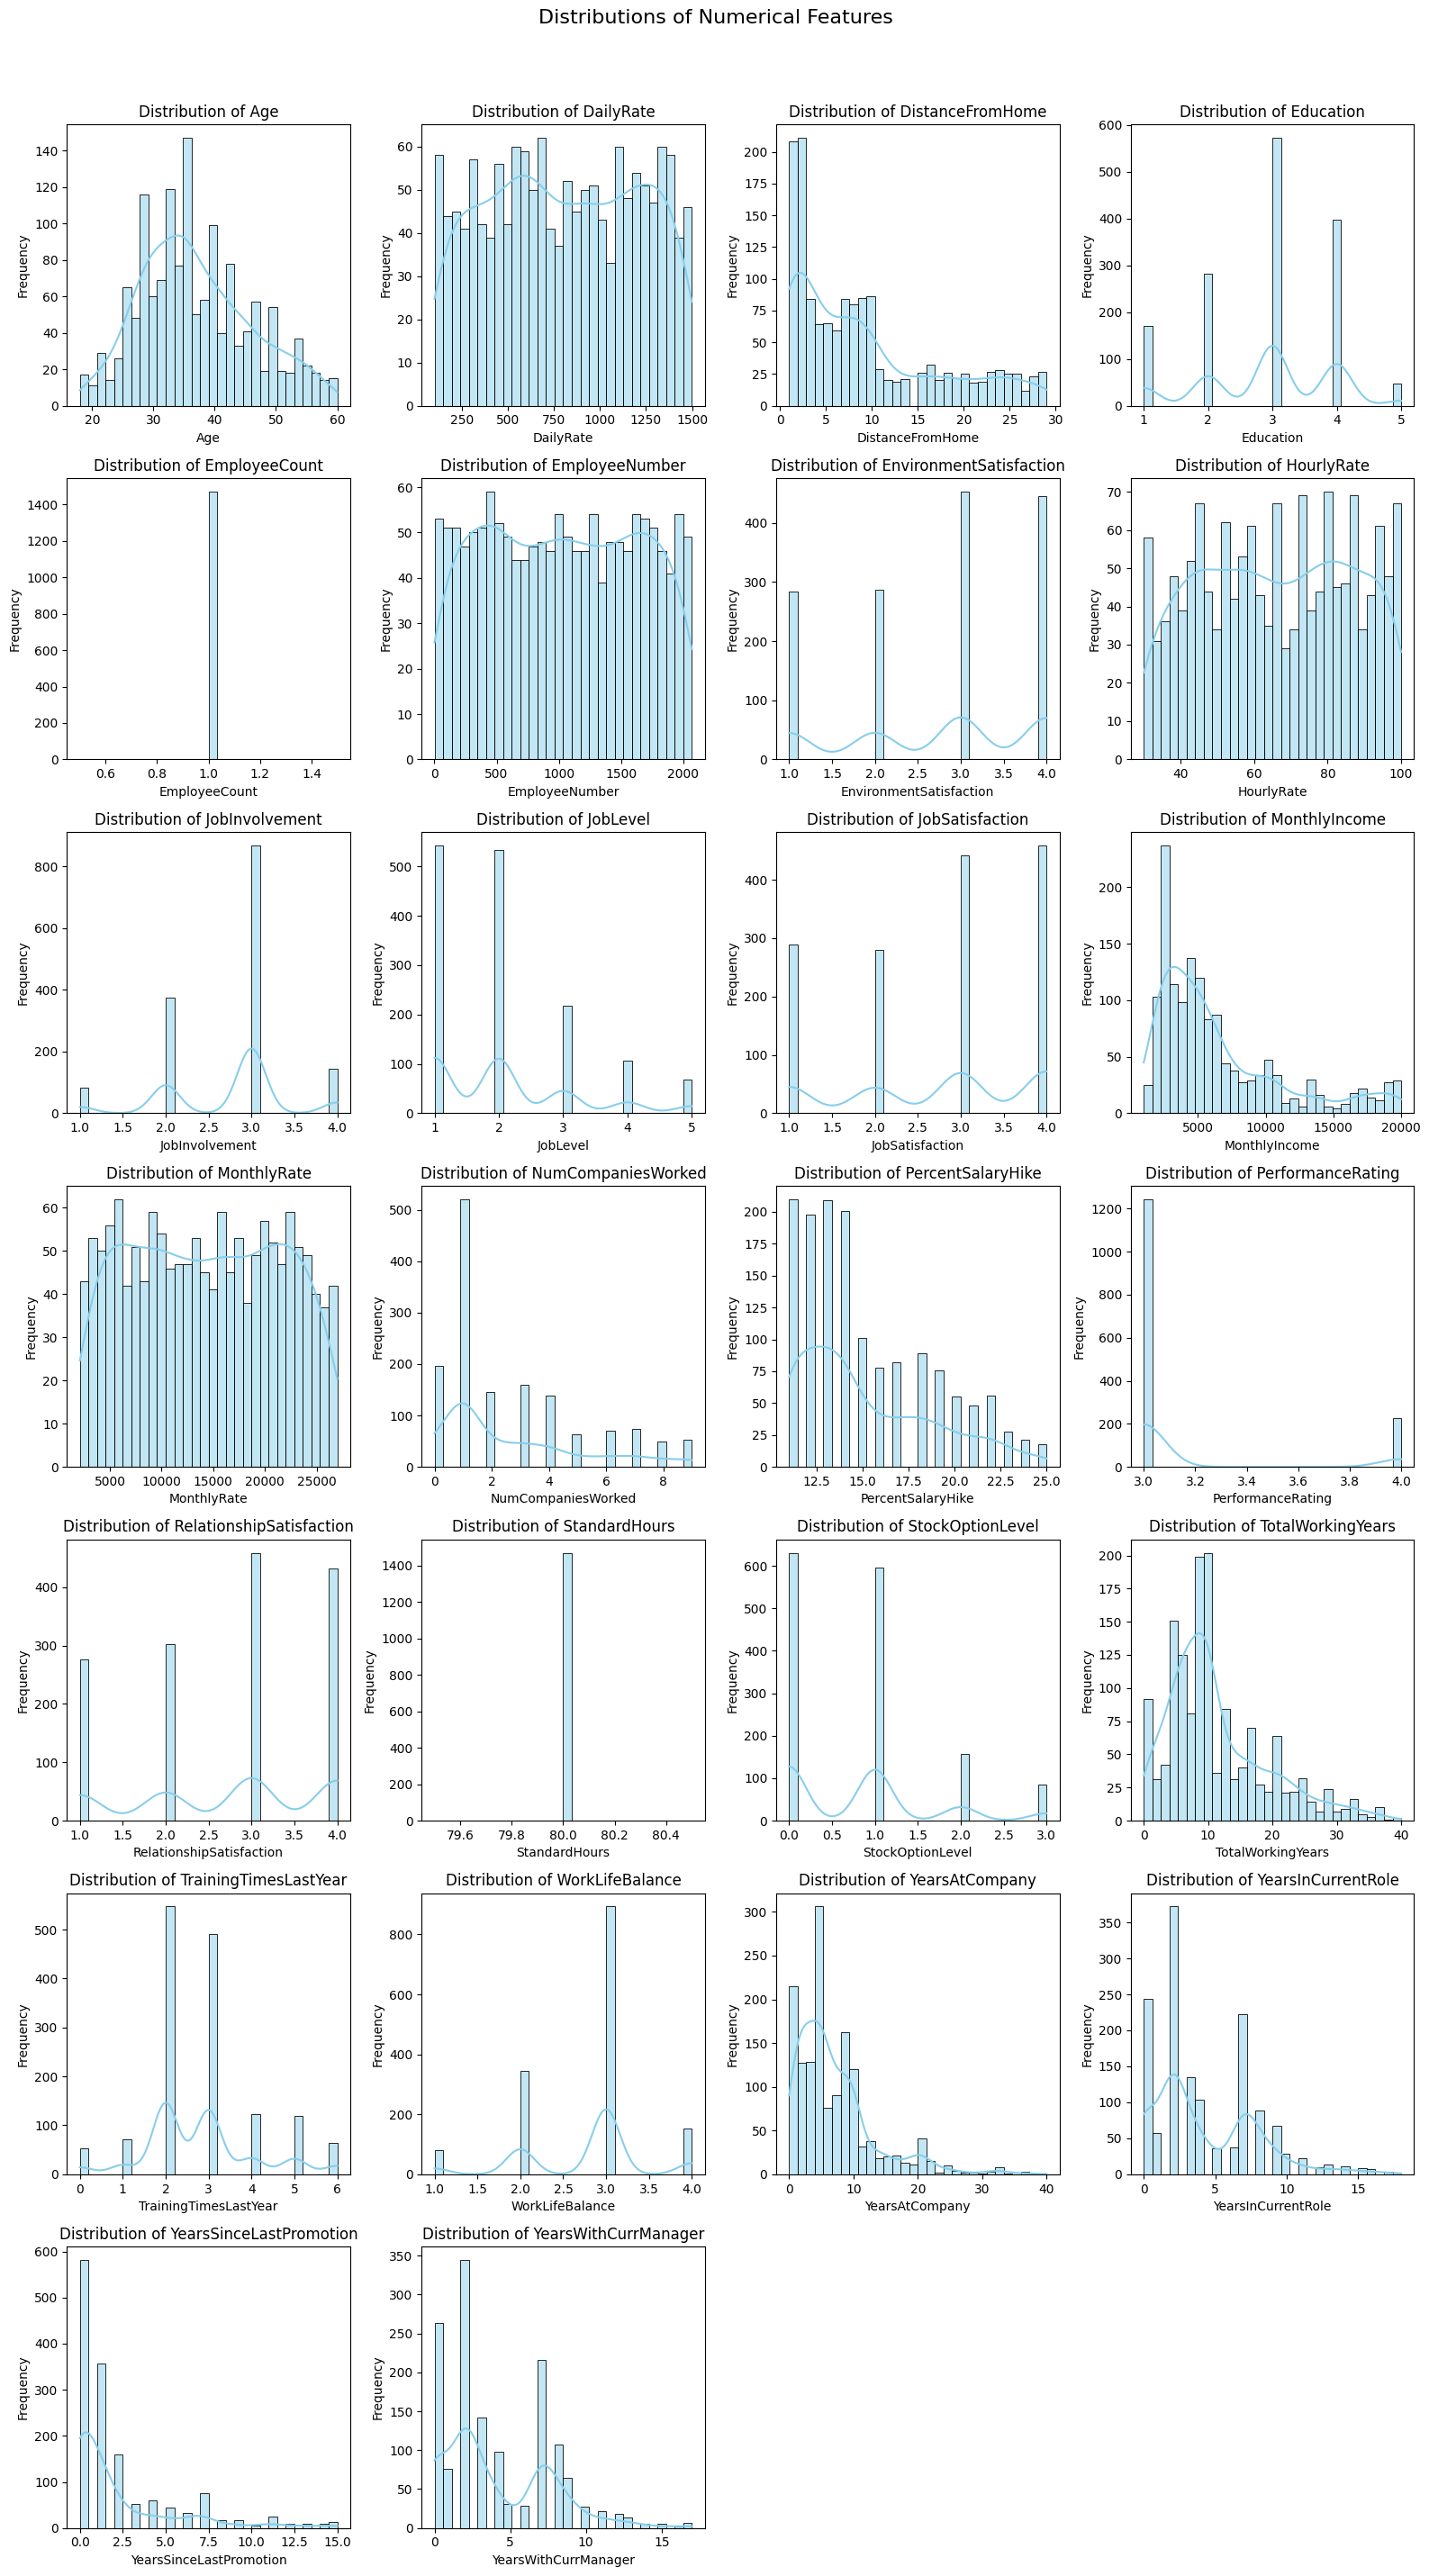

In [10]:
import math
# Checking Distributions
num_features = len(numerical_features.columns)
num_rows = math.ceil(num_features / 4)
num_cols = min(num_features, 4)

plt.figure(figsize=(16, 4 * num_rows))

for i, column in enumerate(numerical_features.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.suptitle('Distributions of Numerical Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

A visual examination of the distribution of numerical features revealed a mix of positively skewed and normally distributed features. This diversity in distributions suggests varying patterns across work-related attributes.

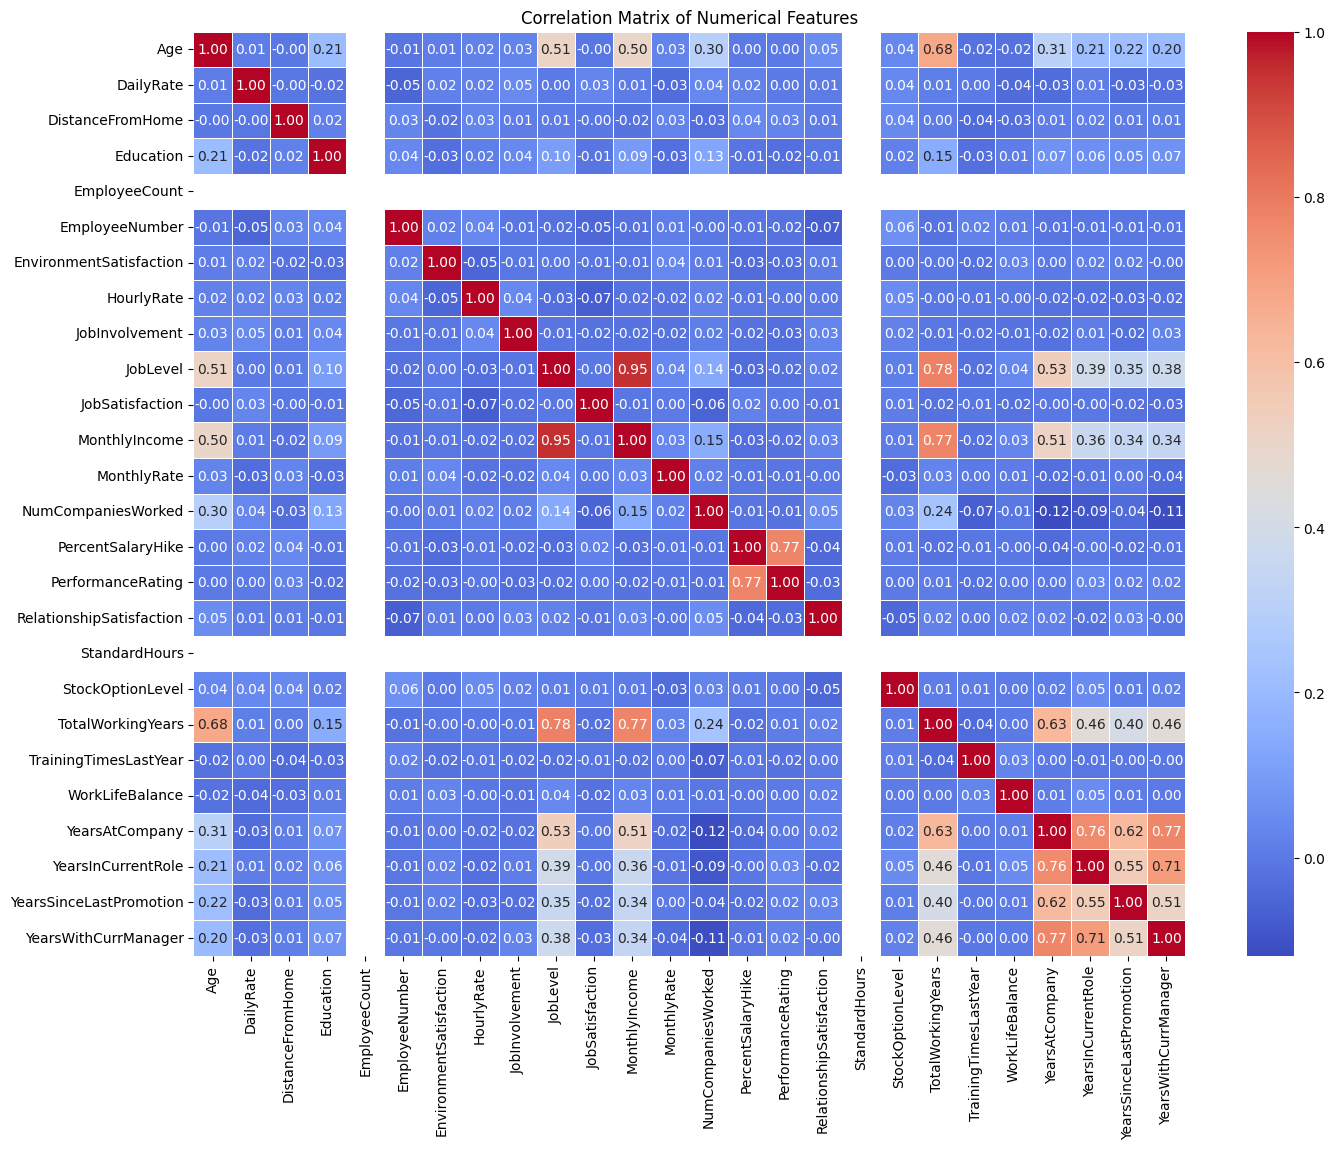

In [11]:
# Checking Correlation
correlation_matrix = numerical_features.corr()

# Plotting the Correlation Matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [12]:
# Set the correlation threshold
correlation_threshold = 0.02

# Calculate the correlation of features with the target variable
correlation_with_target = correlation_matrix['MonthlyIncome']

# Select features that meet the threshold
selected_features = correlation_with_target[correlation_with_target.abs() > correlation_threshold].index

# Identify removed features
removed_features = set(correlation_matrix.columns) - set(selected_features)

# Display the removed features
print("Removed Features:")
print(removed_features)

Removed Features:
{'EmployeeNumber', 'PerformanceRating', 'HourlyRate', 'JobSatisfaction', 'StandardHours', 'EmployeeCount', 'JobInvolvement', 'DistanceFromHome', 'StockOptionLevel', 'EnvironmentSatisfaction', 'DailyRate'}


In this section, a correlation threshold of 0.02 is set to filter out features that have a weak correlation with the target variable (MonthlyIncome). Features with absolute correlations below this threshold are considered less influential and are subsequently removed. The removed features, as listed, include 'HourlyRate', 'EnvironmentSatisfaction', 'StandardHours', 'EmployeeCount', 'PerformanceRating', 'EmployeeNumber', 'DistanceFromHome', 'JobSatisfaction', 'JobInvolvement', 'StockOptionLevel', and 'DailyRate'. These features are deemed to have limited impact on predicting monthly income and are excluded from further analysis to streamline the model.

In [13]:
# Drop the removed features from the original DataFrame 'df'

# Add 'Attrition' to the removed features set
removed_features.add('Attrition')
df = df.drop(columns=removed_features)

# Display the first few rows of the updated DataFrame
df.head()

,Age,BusinessTravel,Department,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,Sales,2,Life Sciences,Female,2,Sales Executive,Single,5993,...,Yes,11,1,8,0,1,6,4,0,5
1,49,Travel_Frequently,Research & Development,1,Life Sciences,Male,2,Research Scientist,Married,5130,...,No,23,4,10,3,3,10,7,1,7
2,37,Travel_Rarely,Research & Development,2,Other,Male,1,Laboratory Technician,Single,2090,...,Yes,15,2,7,3,3,0,0,0,0
3,33,Travel_Frequently,Research & Development,4,Life Sciences,Female,1,Research Scientist,Married,2909,...,Yes,11,3,8,3,3,8,7,3,0
4,27,Travel_Rarely,Research & Development,1,Medical,Male,1,Laboratory Technician,Married,3468,...,No,12,4,6,3,3,2,2,2,2


In [14]:
# Separate features and target variable
X = df.drop('MonthlyIncome', axis=1)
y = df['MonthlyIncome']

# <font color='red'>**One Hot Encoding For Categorical Features**</font>

In [15]:
# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# <font color='red'>**Feature Scaling**</font>

In [16]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the data
X_scaled = scaler.fit_transform(X)

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# <font color='red'>**MODELS**</font>

We have employed a diverse set of models leveraging the Scikit-learn library to analyze our dataset comprehensively. The models include:


**Multiple Linear Regression**
Model: LinearRegression()

**Decision Tree Regressor**
Model: DecisionTreeRegressor(random_state=42)

**Random Forest Regressor**
Model: RandomForestRegressor(n_estimators=100, random_state=42)

**Support Vector Regressor (SVR)**
Model: SVR(kernel='linear')

**Neural Network (MLP - Multi-Layer Perceptron) Regressor)**
Model: MLPRegressor(random_state=42, max_iter=1000)

**Stochastic Gradient Descent (SGD) Regressor**
Model: SGDRegressor(max_iter=1000, tol=1e-3)

**Lasso Regression**
Model: Lasso(alpha=0.1)

This selection of models, implemented with the Scikit-learn framework, allows for a comprehensive exploration and prediction of patterns within our dataset.

In [18]:
# Initialize models
multiple_linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
svr_model = SVR(kernel='linear')
mlp_model = MLPRegressor(random_state=42, max_iter=1000)
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3)
lasso_model = Lasso(alpha=0.1)

In [19]:
# Train models
multiple_linear_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Scaled features for SVR and SGD Regressor
X_train_scaled = scaler.transform(X_train)
svr_model.fit(X_train_scaled, y_train)
sgd_regressor.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


SGDRegressor()

In [20]:
# Make predictions on the test set
multiple_linear_predictions = multiple_linear_model.predict(X_test)
decision_tree_predictions = decision_tree_model.predict(X_test)
random_forest_predictions = random_forest_model.predict(X_test)
mlp_predictions = mlp_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)

# Scale the test features for SVR and SGD Regressor
X_test_scaled = scaler.transform(X_test)
svr_predictions = svr_model.predict(X_test_scaled)
sgd_predictions = sgd_regressor.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Function to evaluate and print metrics for a given model
def evaluate_model(model, X_test, y_test, model_name):
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    print(f"{model_name} Metrics:")
    print(f"  MSE: {mse:.2f}")
    print(f"  R-squared: {r2:.2f}")
    print(f"  MAE: {mae:.2f}")
    print("-" * 40)

    return mse, r2, mae

# Evaluate models and store metrics
multiple_linear_metrics = evaluate_model(multiple_linear_model, X_test, y_test, "Multiple Linear Regression")
decision_tree_metrics = evaluate_model(decision_tree_model, X_test, y_test, "Decision Tree Regressor")
random_forest_metrics = evaluate_model(random_forest_model, X_test, y_test, "Random Forest Regressor")
mlp_metrics = evaluate_model(mlp_model, X_test, y_test, "Neural Network (MLP)")
svr_metrics = evaluate_model(svr_model, X_test_scaled, y_test, "Support Vector Regressor")
sgd_metrics = evaluate_model(sgd_regressor, X_test_scaled, y_test, "SGD Regressor")
lasso_metrics = evaluate_model(lasso_model, X_test, y_test, "Lasso Regression")


Multiple Linear Regression Metrics:
  MSE: 1373648.57
  R-squared: 0.94
  MAE: 893.08
----------------------------------------
Decision Tree Regressor Metrics:
  MSE: 1941534.24
  R-squared: 0.91
  MAE: 1005.97
----------------------------------------
Random Forest Regressor Metrics:
  MSE: 1266131.87
  R-squared: 0.94
  MAE: 826.96
----------------------------------------
Neural Network (MLP) Metrics:
  MSE: 3821771.50
  R-squared: 0.83
  MAE: 1532.05
----------------------------------------
Support Vector Regressor Metrics:
  MSE: 4739503.69
  R-squared: 0.78
  MAE: 1604.92
----------------------------------------
SGD Regressor Metrics:
  MSE: 1559315.71
  R-squared: 0.93
  MAE: 993.02
----------------------------------------
Lasso Regression Metrics:
  MSE: 1373325.98
  R-squared: 0.94
  MAE: 892.87
----------------------------------------


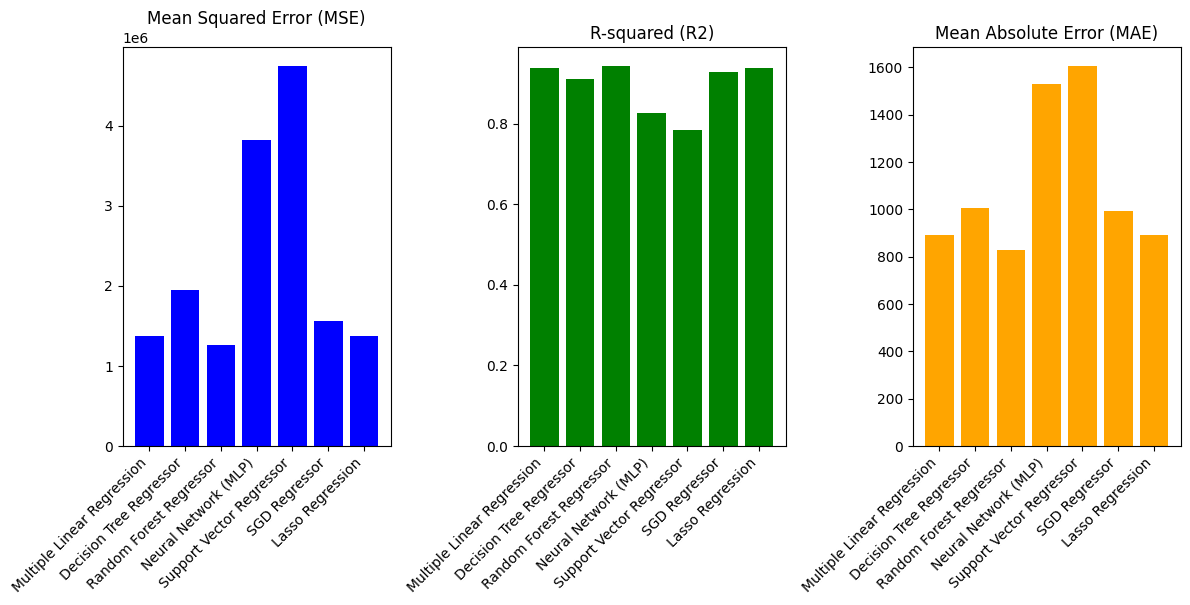

In [22]:
# Data for visualization
model_names = ['Multiple Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Neural Network (MLP)', 'Support Vector Regressor', 'SGD Regressor', 'Lasso Regression']

# Unpack metrics
multiple_linear_mse, multiple_linear_r2, multiple_linear_mae = multiple_linear_metrics
decision_tree_mse, decision_tree_r2, decision_tree_mae = decision_tree_metrics
random_forest_mse, random_forest_r2, random_forest_mae = random_forest_metrics
mlp_mse, mlp_r2, mlp_mae = mlp_metrics
svr_mse, svr_r2, svr_mae = svr_metrics
sgd_mse, sgd_r2, sgd_mae = sgd_metrics
lasso_mse, lasso_r2, lasso_mae = lasso_metrics

# Plotting MSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.bar(model_names, [multiple_linear_mse, decision_tree_mse, random_forest_mse, mlp_mse, svr_mse, sgd_mse, lasso_mse], color='blue')
plt.title('Mean Squared Error (MSE)')
plt.xticks(rotation=45, ha='right')

# Plotting R-squared
plt.subplot(1, 3, 2)
plt.bar(model_names, [multiple_linear_r2, decision_tree_r2, random_forest_r2, mlp_r2, svr_r2, sgd_r2, lasso_r2], color='green')
plt.title('R-squared (R2)')
plt.xticks(rotation=45, ha='right')

# Plotting MAE
plt.subplot(1, 3, 3)
plt.bar(model_names, [multiple_linear_mae, decision_tree_mae, random_forest_mae, mlp_mae, svr_mae, sgd_mae, lasso_mae], color='orange')
plt.title('Mean Absolute Error (MAE)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# <font color='red'>**ANALYSIS**</font>

**Multiple Linear Regression:**

This model has a relatively low MSE and MAE, indicating good predictive performance. The R-squared value of 0.94 suggests that approximately 94% of the variance in the target variable is explained by the model, which is quite high.

**Decision Tree Regressor:**

The Decision Tree model has a higher MSE and MAE compared to Multiple Linear Regression, indicating a slightly less accurate fit. However, the R-squared value of 0.91 still suggests a good level of explanation of the variance.

Random Forest Regressor:

This model has a lower MSE and MAE than both Multiple Linear Regression and Decision Tree, and the R-squared value is also high (0.94), indicating strong predictive performance. Random Forest often provides better generalization by combining multiple decision trees.

Neural Network (MLP):

The Neural Network has a higher MSE and MAE compared to other models, suggesting that it may not fit the data as well. The R-squared value is 0.83, which is good but lower than some other models.

**Support Vector Regressor:**

This model has a higher MSE, lower R-squared, and higher MAE compared to other models, indicating that it might not be the best fit for the data.

**SGD Regressor:**

The Stochastic Gradient Descent (SGD) Regressor performs well with a relatively low MSE, high R-squared, and moderate MAE. It seems to provide a good balance between complexity and accuracy.

**Lasso Regression:**

Similar to Multiple Linear Regression, Lasso Regression performs well with a low MSE and MAE. The R-squared value of 0.94 indicates a good fit to the data.

# <font color='red'>**CONCLUSION**</font>

In this supervised machine learning assignment, we conducted a comprehensive predictive analysis of employee salaries based on various work-related attributes using Python and several libraries, including pandas, numpy, matplotlib, seaborn, and scikit-learn. The dataset, sourced from IBM HR Analytics, comprised 1470 rows and 35 columns, with the target variable being MonthlyIncome.

The exploratory data analysis (EDA) phase involved checking data types, handling outliers, and examining the distribution of numerical features. Outliers were deliberately retained, recognizing their potential to provide unique insights into genuine variations in employee salaries. The distribution analysis revealed a mix of positively skewed and normally distributed features, reflecting diverse patterns across work-related attributes.

Further, we explored the correlation matrix to understand the relationships between numerical features. A correlation threshold of 0.02 was set to filter out less influential features. Features with correlations below this threshold were removed, streamlining the model for enhanced predictive accuracy.

The dataset was preprocessed through one-hot encoding for categorical features and standardization using the StandardScaler. The data was then split into training and testing sets for model evaluation.

We implemented a diverse set of models using the Scikit-learn library:

Multiple Linear Regression
Model: LinearRegression()

Decision Tree Regressor
Model: DecisionTreeRegressor(random_state=42)

Random Forest Regressor
Model: RandomForestRegressor(n_estimators=100, random_state=42)

Support Vector Regressor (SVR)
Model: SVR(kernel='linear')

Neural Network (MLP - Multi-Layer Perceptron) Regressor)
Model: MLPRegressor(random_state=42, max_iter=1000)

Stochastic Gradient Descent (SGD) Regressor
Model: SGDRegressor(max_iter=1000, tol=1e-3)

Lasso Regression
Model: Lasso(alpha=0.1)

The analysis revealed that Random Forest Regressor, Multiple Linear Regression, and Lasso Regression were the top-performing models based on metrics such as Mean Squared Error (MSE), R-squared (R2), and Mean Absolute Error (MAE). Random Forest stood out with the lowest MSE and MAE, suggesting superior predictive performance. Multiple Linear Regression and Lasso Regression, while performing well, also offer better interpretability.

However, Neural Network (MLP) and Support Vector Regressor exhibited higher errors, indicating that they may not be the best models for this specific dataset.

In conclusion, the Random Forest Regressor emerged as the preferred model for predicting employee salaries, providing a robust balance between accuracy and generalization. Multiple Linear Regression and Lasso Regression are also viable options, offering a simpler model structure and good predictive performance. The choice of the most suitable model may depend on the specific requirements of interpretability, complexity, and accuracy in the given context.